# ‏وَأَن لَّيْسَ لِلإِنسَانِ إِلاَّ مَا سَعَى, وَأَنَّ سَعْيَهُ سَوْفَ يُرَى , ثُمَّ يُجْزَاهُ الْجَزَاء الأَوْفَى.

In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
file=pd.read_csv('medical_insurance.csv')

In [70]:
file

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [71]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [72]:
file.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [73]:
file['sex']=file['sex'].map({'male':0,'female':1})

file['smoker']=file['smoker'].map({'no':0,'yes':1})

In [74]:
file

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,southeast,8569.86180
2768,21,1,34.600,0,0,southwest,2020.17700
2769,19,0,26.030,1,1,northwest,16450.89470
2770,23,0,18.715,0,0,northwest,21595.38229


In [75]:
file['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

In [76]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)

encoded_array = encoder.fit_transform(file[['region']])  

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['region']))

file = file.drop(columns=['region'])
file = pd.concat([file, encoded_df], axis=1)


In [77]:
file

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,8569.86180,0.0,0.0,1.0,0.0
2768,21,1,34.600,0,0,2020.17700,0.0,0.0,0.0,1.0
2769,19,0,26.030,1,1,16450.89470,0.0,1.0,0.0,0.0
2770,23,0,18.715,0,0,21595.38229,0.0,1.0,0.0,0.0


In [78]:
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()
columns_of_scale=['age','bmi','children']
file[columns_of_scale]=scaler.fit_transform(file[columns_of_scale])

In [79]:
file

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.296875,1,0.525127,0.0,1,16884.92400,0.0,0.0,0.0,1.0
1,0.281250,0,0.635611,0.2,0,1725.55230,0.0,0.0,1.0,0.0
2,0.437500,0,0.621118,0.6,0,4449.46200,0.0,0.0,1.0,0.0
3,0.515625,0,0.427348,0.0,0,21984.47061,0.0,1.0,0.0,0.0
4,0.500000,0,0.543572,0.0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2767,0.734375,1,0.853002,0.2,0,8569.86180,0.0,0.0,1.0,0.0
2768,0.328125,1,0.651233,0.0,0,2020.17700,0.0,0.0,0.0,1.0
2769,0.296875,0,0.489930,0.2,1,16450.89470,0.0,1.0,0.0,0.0
2770,0.359375,0,0.352249,0.0,0,21595.38229,0.0,1.0,0.0,0.0


In [80]:
file.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,0.611089,0.492785,0.577853,0.220346,0.203463,13261.369959,0.237374,0.239538,0.276335,0.246753
std,0.220023,0.500038,0.115367,0.242961,0.402647,12151.768945,0.425550,0.426879,0.447265,0.431200
min,0.281250,0.000000,0.300395,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,0.406250,0.000000,0.493506,0.000000,0.000000,4687.797000,0.000000,0.000000,0.000000,0.000000
50%,0.609375,0.000000,0.573075,0.200000,0.000000,9333.014350,0.000000,0.000000,0.000000,0.000000
75%,0.796875,1.000000,0.654433,0.400000,0.000000,16577.779500,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


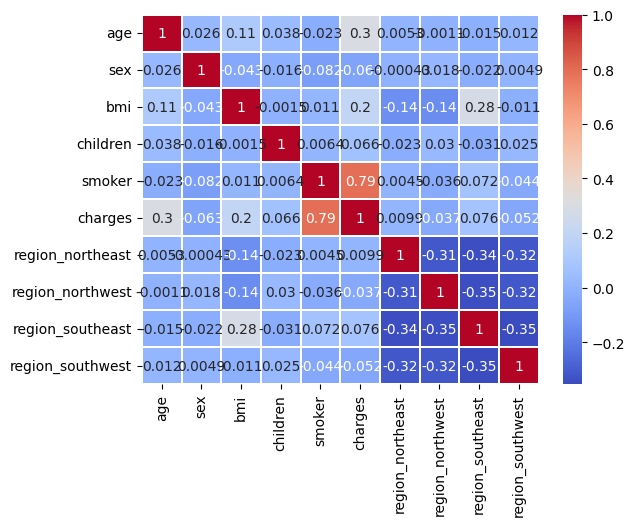

In [81]:
sns.heatmap(file.corr(), annot=True, cmap="coolwarm", linewidths=0.3)
plt.show()

In [82]:
labels=file['charges']
features=file.drop(columns=['charges'],axis=1)

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=.2,random_state=60)


In [84]:
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()
model_1.fit(x_train,y_train)
model_1_predictions=model_1.predict(x_test)

In [85]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,model_1_predictions)
accuracy_1=r2_score(y_test,model_1_predictions)

print("mse= ",mse)
print("R2= ",accuracy_1)

mse=  36236724.766412064
R2=  0.7641047859577721


In [86]:
from sklearn import svm
from sklearn.metrics import mean_squared_error,r2_score

model_2=svm.SVR(kernel='poly',C=10,degree=10)
model_2.fit(x_train,y_train)
model_2_pre=model_2.predict(x_test)

mse_2=mean_squared_error(y_test,model_2_pre)
accuracy_2=r2_score(y_test,model_2_pre)
print("mse= ",mse_2)
print("R2= ",accuracy_2)


mse=  27564641.916066684
R2=  0.8205586419108444
